Problem Statement

Over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen. The content of the data is in german, so one has to translate it first if one can not speak german. Those fields are included: autos.csv:

dateCrawled : when this ad was first crawled, all field-values are taken from this date

name : "name" of the car

seller : private or dealer

offerType

price : the price on the ad to sell the car

abtest

vehicleType

yearOfRegistration : at which year the car was first registered

gearbox

powerPS : power of the car in PS

model

kilometer : how many kilometers the car has driven

monthOfRegistration : at which month the car was first registered

fuelType

brand

notRepairedDamage : if the car has a damage which is not repaired yet

dateCreated : the date for which the ad at ebay was created

nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )

postalCode

lastSeenOnline : when the crawler saw this ad last online

The fields lastSeen and dateCreated could be used to estimate how long a car will be at least online before it is sold.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('autos.csv', sep=',', encoding='latin-1')

In [3]:
df.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [4]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [5]:
df.count()

dateCrawled            371528
name                   371528
seller                 371528
offerType              371528
price                  371528
abtest                 371528
vehicleType            333659
yearOfRegistration     371528
gearbox                351319
powerPS                371528
model                  351044
kilometer              371528
monthOfRegistration    371528
fuelType               338142
brand                  371528
notRepairedDamage      299468
dateCreated            371528
nrOfPictures           371528
postalCode             371528
lastSeen               371528
dtype: int64

In [6]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
for i in df.columns:
    print(i,": ",len(df[i].unique()))

dateCrawled :  280500
name :  233531
seller :  2
offerType :  2
price :  5597
abtest :  2
vehicleType :  9
yearOfRegistration :  155
gearbox :  3
powerPS :  794
model :  252
kilometer :  13
monthOfRegistration :  13
fuelType :  8
brand :  40
notRepairedDamage :  3
dateCreated :  114
nrOfPictures :  1
postalCode :  8150
lastSeen :  182806


In [8]:
df.drop(["nrOfPictures","notRepairedDamage","abtest","name","model"],inplace=True,axis=1)

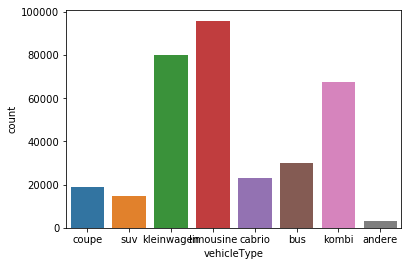

In [9]:
sns.countplot(x="vehicleType",data=df)

In [10]:
df.yearOfRegistration.unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1968, 1982, 1976, 1983, 1959, 1973, 1111, 1969, 1971,
       1987, 1986, 1988, 1967, 1970, 1965, 1945, 1925, 1974, 1979, 1955,
       1978, 1972, 1977, 1961, 1963, 1964, 1960, 1966, 1975, 1937, 1936,
       5000, 1954, 1958, 9999, 1956, 3200, 1000, 1933, 1941, 1962, 8888,
       1500, 2200, 4100, 1929, 1951, 1957, 1940, 3000, 2066, 1949, 2019,
       1800, 1953, 1935, 1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911,
       1400, 1950, 4000, 1948, 1952, 1200, 8500, 1932, 1255, 1927, 1923,
       1931, 3700, 3800, 4800, 1942, 7000, 1911, 6500, 2290, 2500, 1930,
       1001, 6200, 9450, 1944, 1943, 1947, 1934, 1938, 1688, 2800, 1253,
       1928, 7500, 1919, 5555, 7777, 5600, 1600, 1939, 2222, 1039, 9996,
       1300, 8455, 1915, 4500, 1920, 1602, 7800, 92

In [11]:
df=df[df.yearOfRegistration.isin(range(1960,2017))]

In [13]:
len(df["powerPS"].unique())

781

In [14]:
df=df[df.powerPS.isin(range(10,601))]

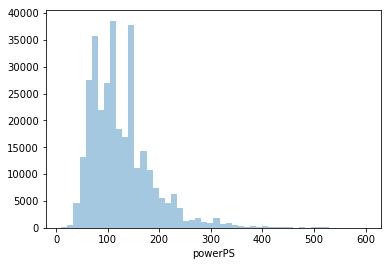

In [15]:
sns.distplot(a=(df["powerPS"]),kde=False)

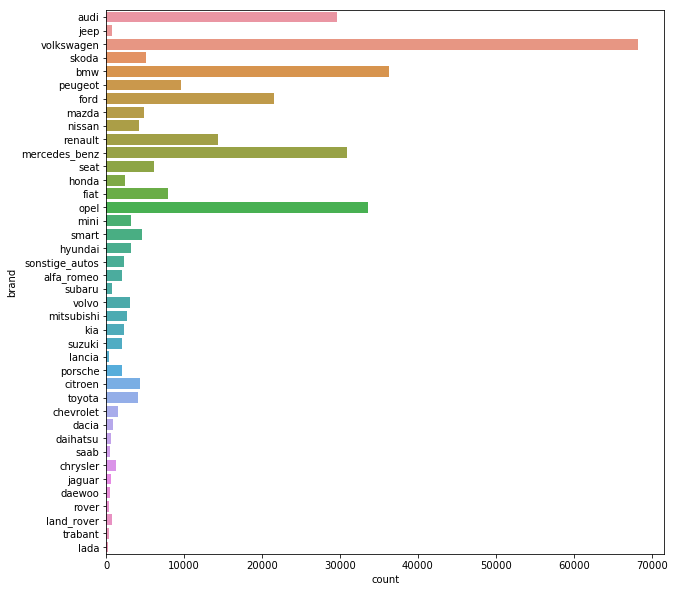

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(y="brand",data=df)

In [17]:
df=df[df.brand!="sontige_autos"]

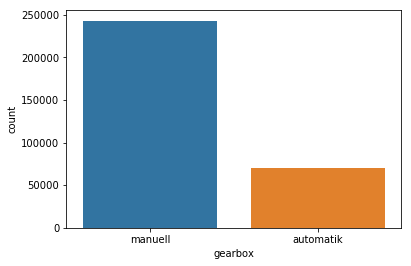

In [18]:
sns.countplot("gearbox",data=df)

In [19]:
df["gearbox"]=df["gearbox"].fillna('manuell')

In [20]:
df=df[df.powerPS.isin(range(100,150000))]

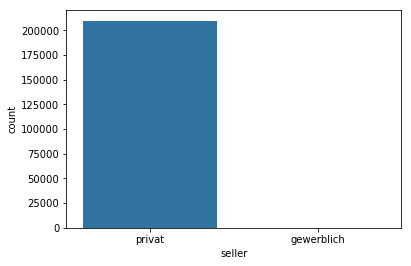

In [21]:
sns.countplot("seller",data=df)

In [22]:
df=df[df.seller!="gewerblich"]
df.drop("seller",inplace=True,axis=1)

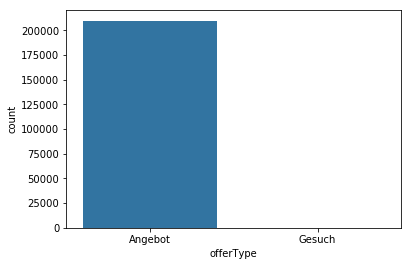

In [23]:
sns.countplot("offerType",data=df)

In [24]:
df=df[df.offerType!="Gesuch"]
df.drop("offerType",inplace=True,axis=1)

In [25]:
df.isnull().sum()

dateCrawled               0
price                     0
vehicleType            6114
yearOfRegistration        0
gearbox                   0
powerPS                   0
kilometer                 0
monthOfRegistration       0
fuelType               9386
brand                     0
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [26]:
df=df[df.price.isin(range(100,150000))]

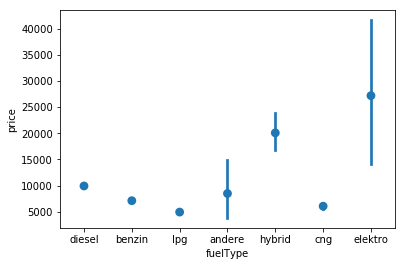

In [27]:
sns.pointplot(x="fuelType",y="price",data=df,join=False)

In [28]:
df.fuelType.fillna("andere",inplace=True)

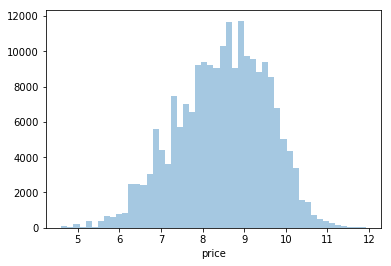

In [29]:
sns.distplot(a=np.log(df["price"]),kde=False)

In [30]:
df.vehicleType.unique()

array(['coupe', 'suv', 'limousine', 'cabrio', 'bus', 'kleinwagen', 'kombi',
       'andere', nan], dtype=object)

In [31]:
df.vehicleType.fillna("Other",inplace=True)

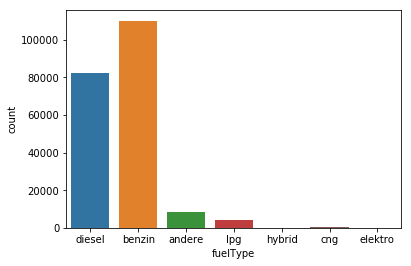

In [32]:
sns.countplot("fuelType",data=df)

In [33]:
df.price=np.log(df.price)

In [34]:
df

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
1,2016-03-24 10:58:45,9.814656,coupe,2011,manuell,190,125000,5,diesel,audi,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9.190138,suv,2004,automatik,163,125000,8,diesel,jeep,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
5,2016-04-04 17:36:23,6.476972,limousine,1995,manuell,102,150000,10,benzin,bmw,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,7.696213,cabrio,2004,manuell,109,150000,8,benzin,peugeot,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
8,2016-04-04 23:42:13,9.581904,bus,2014,manuell,125,30000,8,benzin,ford,2016-04-04 00:00:00,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,6.906755,kleinwagen,1998,manuell,101,150000,0,andere,volkswagen,2016-03-17 00:00:00,27472,2016-03-31 17:17:06
10,2016-03-26 19:54:18,7.600902,limousine,2004,manuell,105,150000,12,benzin,mazda,2016-03-26 00:00:00,96224,2016-04-06 10:45:34
11,2016-04-07 10:06:22,7.937017,kombi,2005,manuell,140,150000,12,diesel,volkswagen,2016-04-07 00:00:00,57290,2016-04-07 10:25:17
12,2016-03-15 22:49:09,6.906755,kombi,1995,manuell,115,150000,11,benzin,volkswagen,2016-03-15 00:00:00,37269,2016-04-01 13:16:16
13,2016-03-21 21:37:40,7.824046,kombi,2004,manuell,131,150000,2,andere,volkswagen,2016-03-21 00:00:00,90762,2016-03-23 02:50:54


In [35]:
def data_trans(data):
    data=data.split()[0]
    return data

In [36]:
df.dateCreated=df["dateCreated"].apply(data_trans)
df.lastSeen=df["lastSeen"].apply(data_trans)
df.drop("dateCrawled",inplace=True,axis=1)

In [37]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
1,9.814656,coupe,2011,manuell,190,125000,5,diesel,audi,2016-03-24,66954,2016-04-07
2,9.190138,suv,2004,automatik,163,125000,8,diesel,jeep,2016-03-14,90480,2016-04-05
5,6.476972,limousine,1995,manuell,102,150000,10,benzin,bmw,2016-04-04,33775,2016-04-06
6,7.696213,cabrio,2004,manuell,109,150000,8,benzin,peugeot,2016-04-01,67112,2016-04-05
8,9.581904,bus,2014,manuell,125,30000,8,benzin,ford,2016-04-04,94505,2016-04-04


In [38]:
def days_online(data):
    from datetime import datetime
    date_format = "%Y-%m-%d"
    return (datetime.strptime(data.lastSeen, date_format)-datetime.strptime(data.dateCreated, date_format)).days

In [39]:
df["days_online"]=df.apply(days_online,axis=1)
df.drop("dateCreated",inplace=True,axis=1)
df.drop("lastSeen",inplace=True,axis=1)

In [40]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [41]:
columns=["vehicleType","gearbox","fuelType","brand"]
for i in columns:
    df[i]=le.fit_transform(df[i])

In [42]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,postalCode,days_online
1,9.814656,4,2011,1,190,125000,5,3,1,66954,14
2,9.190138,8,2004,0,163,125000,8,3,14,90480,22
5,6.476972,7,1995,1,102,150000,10,1,2,33775,2
6,7.696213,3,2004,1,109,150000,8,1,25,67112,4
8,9.581904,2,2014,1,125,30000,8,1,10,94505,0
